#1.Instalación del modelo:

In [4]:
!pip install git+https://github.com/facebookresearch/segment-anything.git



  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-cs1m1pnm
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-cs1m1pnm
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=a380d6df06edb4f0d0ff0e03a8ef5bb5c47cabaa746e560e1604c5c6b582ecdf
  Stored in directory: /tmp/pip-ephem-wheel-cache-yw5zlvis/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


 1.1 hay q editar colab para que ejecute la GPUP T4 y que pueda utilizar la libreria CUDA de NVIDIA ; y se verifica su respectivo cambio

In [1]:
import torch
print(torch.cuda.is_available())  # Debería devolver True si CUDA está habilitado
print(torch.cuda.get_device_name(0))  # Muestra el nombre de la GPU


True
Tesla T4


In [6]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.9 MB/s eta 0:00:00


# 2. Cargar imagen de prueba y el modelo SAM:

In [26]:
# Import necessary libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor
from PIL import Image

# Asegurarse de que la GPU está disponible
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(f"Usando {device}")

# Paso 1: Cargar imagen y modelo SAM
image = cv2.imread("/content/fauce.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB

# Cargar el modelo
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h.pth").to(device)
predictor = SamPredictor(sam)
predictor.set_image(image)

print("Modelo cargado y predictor listo.")


Usando cuda
Modelo cargado y predictor listo.


#3. Seleccionar punto o caja para segmentar y obtener máscara

In [27]:
input_point = np.array([[300, 300]])  # punto en la imagen
input_label = np.array([1])
masks, scores, _ = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=True)


# 4. Visualizar resultados y guardar máscaras

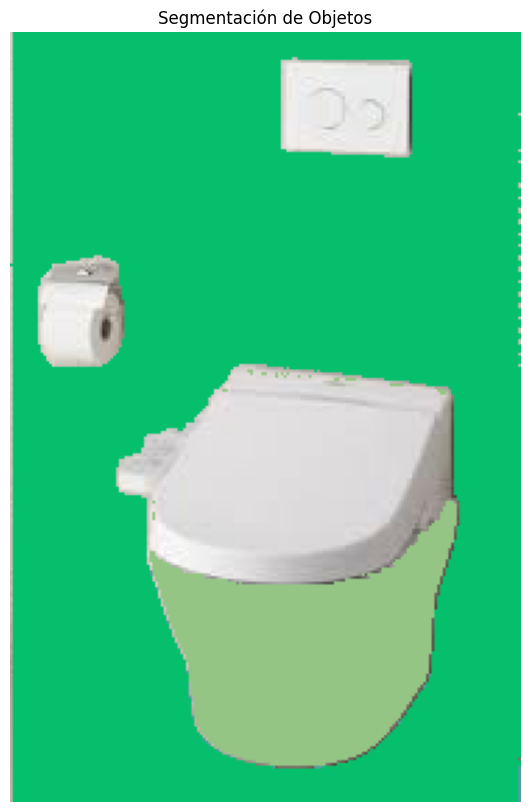

True

In [28]:


# # Paso 2: Realizar la segmentación
# input_point = np.array([[100, 100]])  # Puedes poner las coordenadas del clic
# input_label = np.array([1])  # La etiqueta, si es 1 es para el objeto (por ejemplo)

# # Obtener la máscara de la segmentación
# masks, scores, logits = predictor.predict(input_point, input_label, multimask_output=True)

# Paso 3: Visualizar las máscaras
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)

# Crear una copia de la imagen original para aplicar las máscaras
output_image = image.copy()

# Superponer las máscaras sobre la imagen original
for i, mask in enumerate(masks):
    mask = mask.astype(np.uint8)
    color = np.random.rand(3,)  # Un color aleatorio para cada máscara
    output_image[mask == 1] = (color * 255).astype(np.uint8)  # Aplicar color sobre la máscara

# Mostrar la imagen con las máscaras superpuestas
ax.imshow(output_image)
plt.title("Segmentación de Objetos")
plt.axis('off')  # Opcional, para quitar los ejes
plt.show()

# Paso 4: Guardar la imagen con las máscaras superpuestas
cv2.imwrite("segmentation_output.png", cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))  # Guardar como PNG


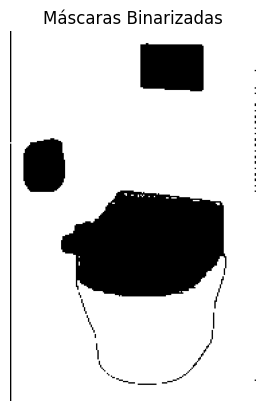

True

In [29]:
# Paso 4: Crear una imagen binarizada con las máscaras
binarized_image = np.zeros_like(image)  # Crear una imagen negra del mismo tamaño

# Superponer las máscaras en blanco sobre la imagen binaria
for mask in masks:
    binarized_image[mask == 1] = [255, 255, 255]  # Poner en blanco las áreas de la máscara

# Mostrar la imagen binarizada con las máscaras
plt.imshow(binarized_image)
plt.title("Máscaras Binarizadas")
plt.axis('off')
plt.show()

# Guardar la imagen binarizada con las máscaras
cv2.imwrite("segmentation_output_binary.png", cv2.cvtColor(binarized_image, cv2.COLOR_RGB2BGR))  # Guardar como PNG binarizada


https://chatgpt.com/share/681192e8-9ad8-8004-8226-0b9ae2a21f1f